In [22]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# Loading the Data

In [6]:
categories = ['cats','dogs']

#loading data
test_folder=r'C:\\Users\\Mario\\Downloads\\dogs-vs-cats\\train\\'

img_size = 100
data = []

for i in categories:
    folder = os.path.join(test_folder,i)
    label = categories.index(i)
    for _ in os.listdir(folder):
        img_path = os.path.join(folder,_)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])

random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)/255
y = np.array(y)

print(X.shape,y.shape)

(25000, 100, 100, 3) (25000,)


# Creating Model

In [9]:
model = Sequential()
def create_model(X,y,epochs,validation):
    model.add(Conv2D(64, (3,3), activation= 'relu'))
    model.add(MaxPool2D((2,2)))

    model.add(Conv2D(64, (3,3), activation= 'relu'))
    model.add(MaxPool2D((2,2)))
    
    model.add(Conv2D(64, (3,3), activation= 'relu'))
    model.add(MaxPool2D((2,2)))
    
    model.add(Conv2D(64, (3,3), activation= 'relu'))
    model.add(MaxPool2D((2,2)))
    
    
    model.add(Flatten())
    model.add(Dense(128, input_shape=X.shape[1:],activation='relu'))

    model.add(Dense(128,activation='relu'))
    
    model.add(Dense(2,activation='softmax'))

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X,y,epochs=epochs, validation_split=validation)

In [10]:
create_model(X,y,10,0.1)

Epoch 1/10
704/704 [==============================] - 47s 38ms/step - loss: 0.6919 - accuracy: 0.5200 - val_loss: 0.6667 - val_accuracy: 0.60960s - los
Epoch 2/10
704/704 [==============================] - 21s 30ms/step - loss: 0.6070 - accuracy: 0.6718 - val_loss: 0.5197 - val_accuracy: 0.7528
Epoch 3/10
704/704 [==============================] - 21s 30ms/step - loss: 0.4801 - accuracy: 0.7687 - val_loss: 0.4406 - val_accuracy: 0.7944
Epoch 4/10
704/704 [==============================] - 20s 29ms/step - loss: 0.4076 - accuracy: 0.8141 - val_loss: 0.4115 - val_accuracy: 0.8092
Epoch 5/10
704/704 [==============================] - 20s 29ms/step - loss: 0.3633 - accuracy: 0.8368 - val_loss: 0.3689 - val_accuracy: 0.8408
Epoch 6/10
704/704 [==============================] - 21s 30ms/step - loss: 0.3181 - accuracy: 0.8600 - val_loss: 0.3803 - val_accuracy: 0.8316
Epoch 7/10
704/704 [==============================] - 20s 29ms/step - loss: 0.2817 - accuracy: 0.8787 - val_loss: 0.3539 - val_a

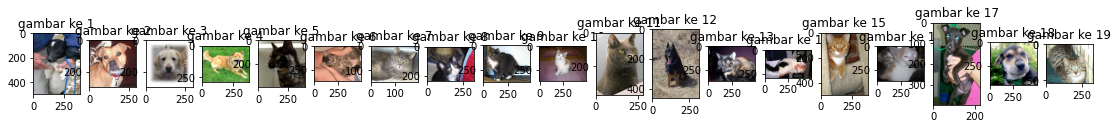

In [10]:
plt.figure(figsize=(20,20))
target_dir = r'C:/Users/Mario/Downloads/dogs-vs-cats/test1/test1/'
for i in range(1,20):
    file_target = os.path.join(target_dir,str(i)+'.jpg')
    img=mpimg.imread(file_target)
    ax=plt.subplot(1,20,i+1)
    ax.title.set_text(f"gambar ke {i}")
    plt.imshow(img)

# Testing

In [11]:
target_dir = r'C:\\Users\\Mario\\Downloads\\dogs-vs-cats\\test1\\test1\\'
for i in range(1,20):
    file_target = os.path.join(target_dir,str(i)+'.jpg')
    img_target = cv2.imread(file_target)
    img_target = cv2.resize(img_target,(img_size,img_size))
    data_target = np.array([img_target])
    predictions = model.predict(data_target)
    if predictions[0][0] == 1:
        print(f"img {i} a cat")
    else:
        print(f"img {i} a dog")

img 1 a dog
img 2 a dog
img 3 a dog
img 4 a dog
img 5 a cat
img 6 a cat
img 7 a cat
img 8 a dog
img 9 a dog
img 10 a cat
img 11 a cat
img 12 a dog
img 13 a dog
img 14 a cat
img 15 a cat
img 16 a dog
img 17 a dog
img 18 a dog
img 19 a dog


# konfigurasi train yang saya gunakan:
img size = 100 x 100
optimmizer = adam
3 dense, 3 Conv2D, 3 maxpool2D